# Machine learning steps 

## 1. Define the problem

###  In this honey price question, we are doing a question to predict the price, different honey with different features would have different price. So this question would be a regression question. 

#### Tips: for regression and classification, if your predict answer is something with different answer, then it would be a regression. But if your predict only has a few certain stuff, that would be classification 

## 2. Prepare the data

### 2.1 check the dataset

In [164]:
import pandas as pd
import numpy as np

In [165]:
df = pd.read_csv("H:\\Applied Data Project\\archive\honey_purity_dataset.csv")
df.head()

,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity,Price
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,Blueberry,4844.50,0.68,645.24
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,Alfalfa,6689.02,0.89,385.85
2,4.61,1.84,23.72,7.31,0.80,27.47,34.36,Chestnut,6883.60,0.66,639.64
3,1.77,1.40,16.61,4.01,0.78,31.52,28.15,Blueberry,7167.56,1.00,946.46
4,6.11,1.25,19.63,4.82,0.90,29.65,42.52,Alfalfa,5125.44,1.00,432.62


#### keep going on checking to see if the dataset has missing values, errors and duplicates

#### data overview

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247903 entries, 0 to 247902
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CS               247903 non-null  float64
 1   Density          247903 non-null  float64
 2   WC               247903 non-null  float64
 3   pH               247903 non-null  float64
 4   EC               247903 non-null  float64
 5   F                247903 non-null  float64
 6   G                247903 non-null  float64
 7   Pollen_analysis  247903 non-null  object 
 8   Viscosity        247903 non-null  float64
 9   Purity           247903 non-null  float64
 10  Price            247903 non-null  float64
dtypes: float64(10), object(1)
memory usage: 20.8+ MB


#### data stat describe

In [167]:
df.describe()

,CS,Density,WC,pH,EC,F,G,Viscosity,Purity,Price
count,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000
mean,5.500259,1.535523,18.502625,4.996047,0.799974,34.970573,32.501006,5752.893888,0.824471,594.807644
std,2.593947,0.187824,3.748635,1.444060,0.057911,8.655898,7.226290,2455.739903,0.139417,233.627972
min,1.000000,1.210000,12.000000,2.500000,0.700000,20.000000,20.000000,1500.050000,0.610000,128.720000
25%,3.260000,1.370000,15.260000,3.750000,0.750000,27.460000,26.230000,3627.880000,0.660000,433.000000
50%,5.500000,1.540000,18.510000,4.990000,0.800000,34.970000,32.490000,5753.770000,0.820000,612.960000
75%,7.740000,1.700000,21.750000,6.250000,0.850000,42.470000,38.760000,7886.650000,0.970000,770.220000
max,10.000000,1.860000,25.000000,7.500000,0.900000,50.000000,45.000000,9999.970000,1.000000,976.690000


#### check null value

In [168]:
df.isnull().sum()

CS                 0
Density            0
WC                 0
pH                 0
EC                 0
F                  0
G                  0
Pollen_analysis    0
Viscosity          0
Purity             0
Price              0
dtype: int64

#### check duplicated

In [169]:
df.duplicated().sum()

0

### 2.2 Through the work we did above, we almost know our data is cleaned. Otherwise we need to do data cleaning in this step.

### 2.3 Explore data

#### Basic destribution

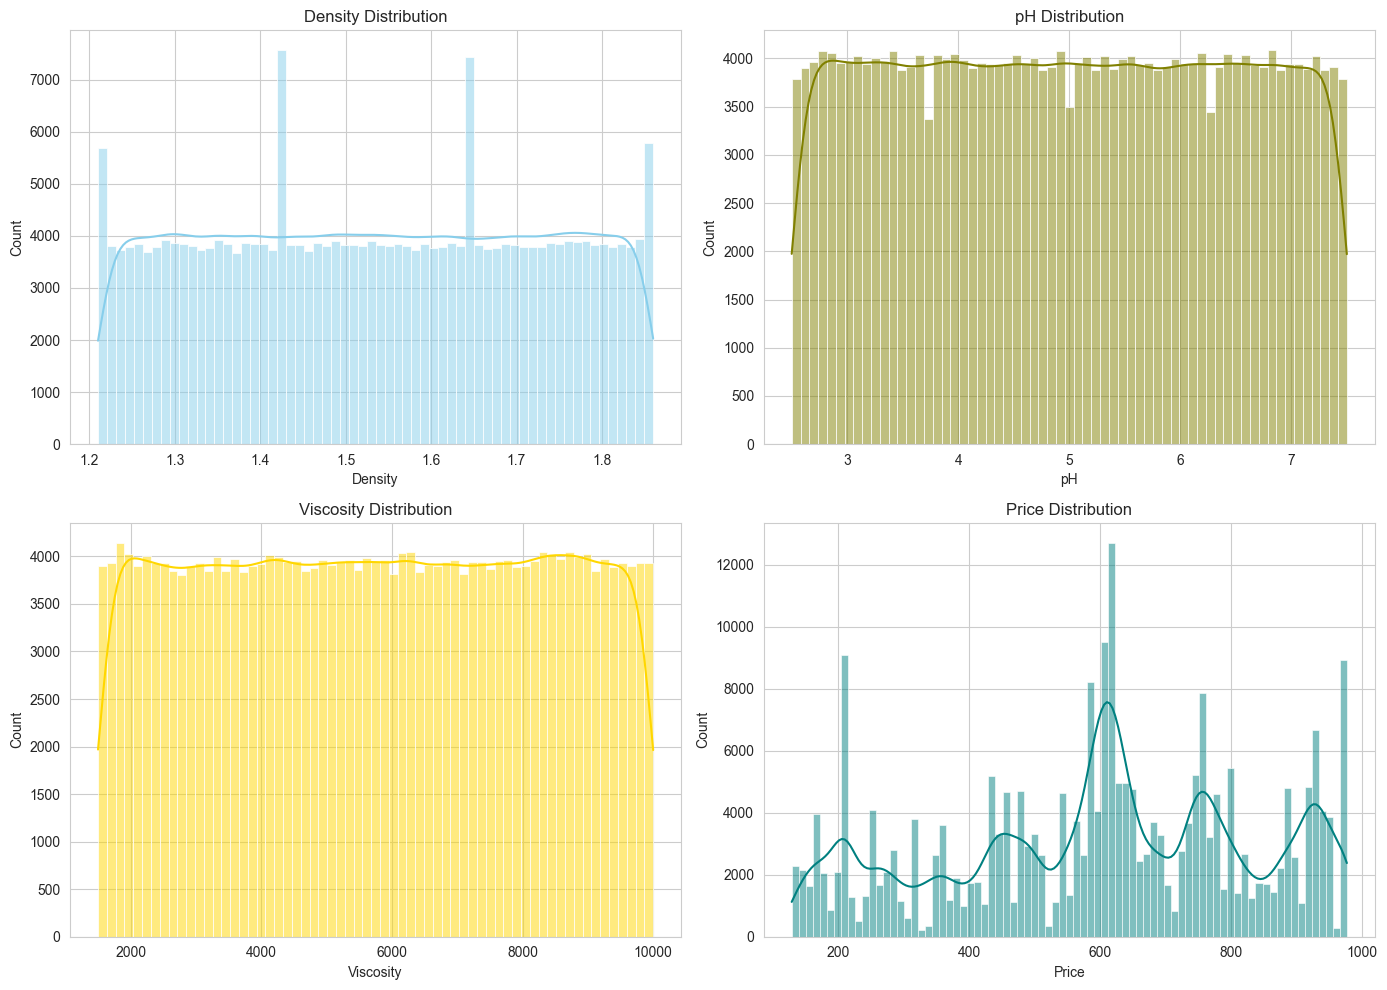

In [170]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Prepare the figure
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot histograms
sns.histplot(data=df, x="Density", kde=True, ax=axs[0, 0], color="skyblue")
sns.histplot(data=df, x="pH", kde=True, ax=axs[0, 1], color="olive")
sns.histplot(data=df, x="Viscosity", kde=True, ax=axs[1, 0], color="gold")
sns.histplot(data=df, x="Price", kde=True, ax=axs[1, 1], color="teal")

# Set titles
axs[0, 0].set_title('Density Distribution')
axs[0, 1].set_title('pH Distribution')
axs[1, 0].set_title('Viscosity Distribution')
axs[1, 1].set_title('Price Distribution')

plt.tight_layout()
plt.show()

The histogram allows us to observe the distribution of the following features:

Density: shows an approximately normal distribution.
pH: the distribution is relatively uniform and covers a wide range.
Viscosity: the distribution shows a clear normal character.
Price: the distribution appears to be right skewed, indicating that most of the honey was low priced, but there were a small number of higher priced samples.

#### Now let's look at the distribution of the data using a line box plot and also see if it's an outlier situation

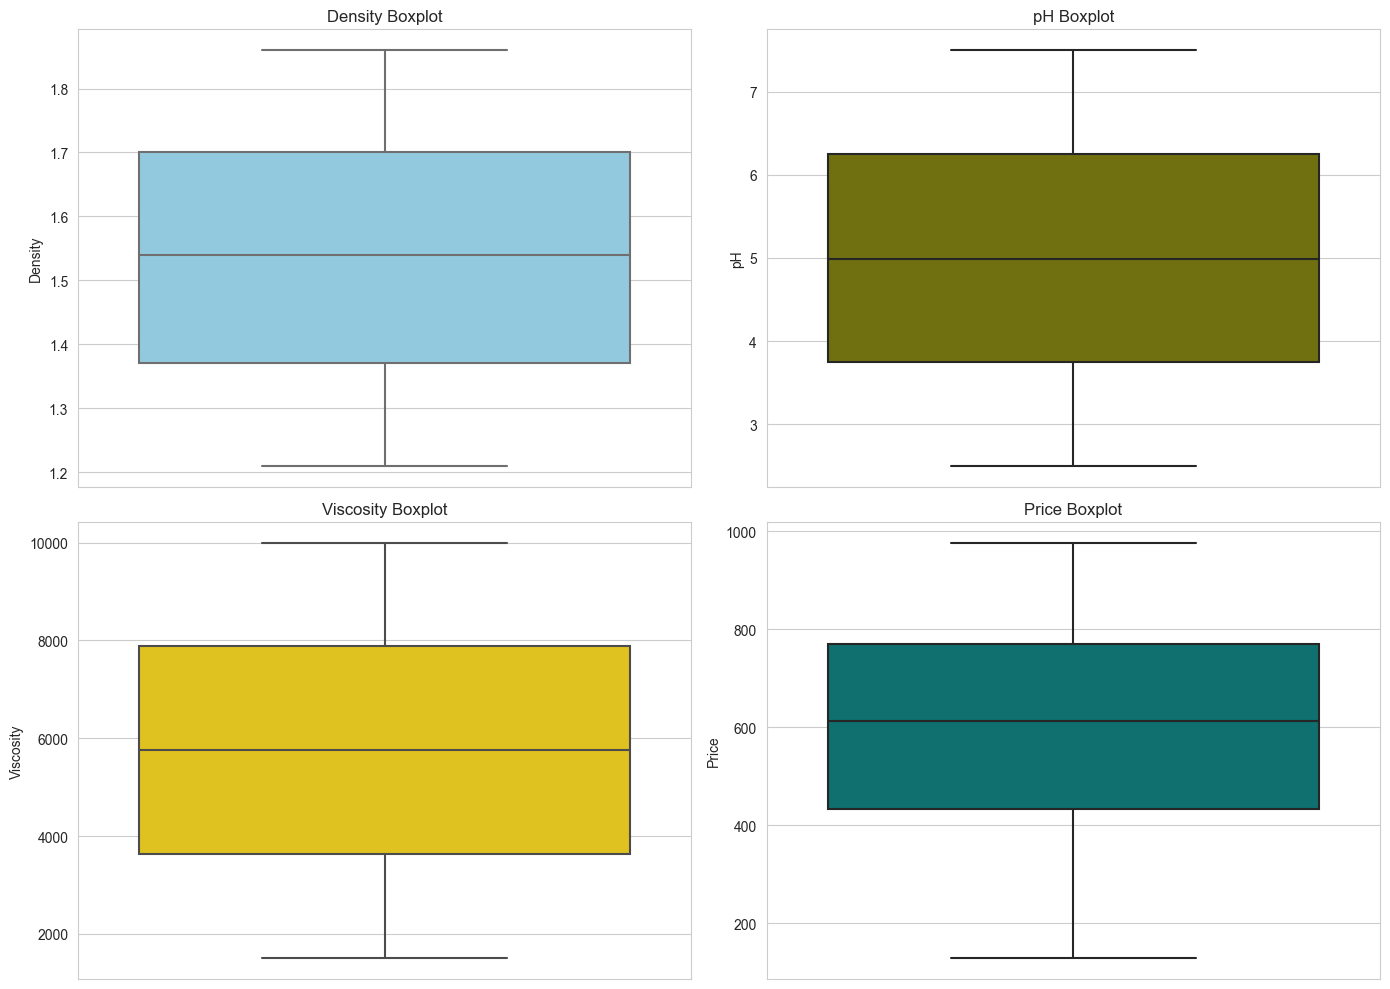

In [171]:
# Prepare the figure for boxplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot boxplots
sns.boxplot(data=df, y="Density", ax=axs[0, 0], color="skyblue")
sns.boxplot(data=df, y="pH", ax=axs[0, 1], color="olive")
sns.boxplot(data=df, y="Viscosity", ax=axs[1, 0], color="gold")
sns.boxplot(data=df, y="Price", ax=axs[1, 1], color="teal")

# Set titles
axs[0, 0].set_title('Density Boxplot')
axs[0, 1].set_title('pH Boxplot')
axs[1, 0].set_title('Viscosity Boxplot')
axs[1, 1].set_title('Price Boxplot')

plt.tight_layout()
plt.show()

The boxplot shows potential outliers in the characteristics Density, pH, Viscosity, and Price:

Density: the overall distribution is relatively tight, with few outliers.
pH: Wide distribution, with some outliers above the normal range.
Viscosity (Viscosity): the distribution is relatively centralized, but there are some outliers above the upper quartile.
Price (Price): the distribution of prices contains a relatively large number of high price outliers.

#### Check correlation

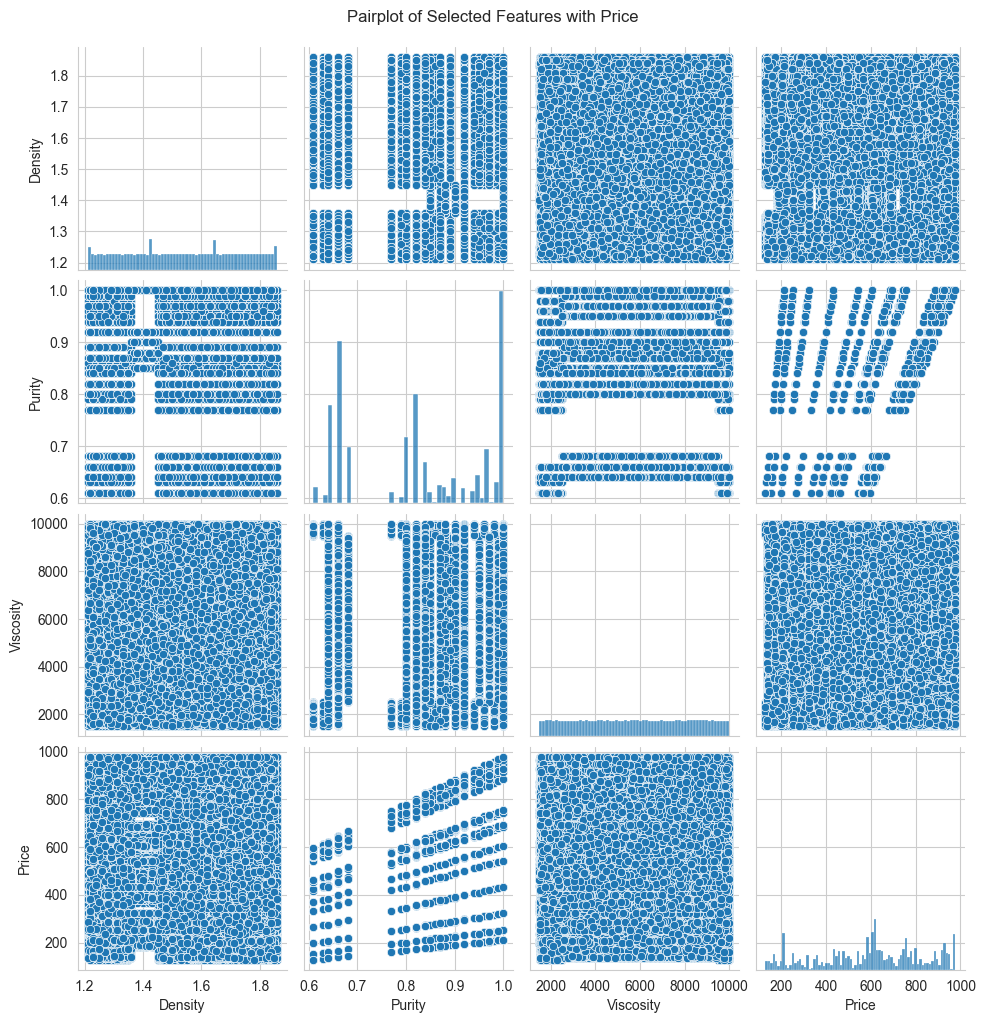

In [172]:
# Select a subset of the dataframe with the chosen features for visualization
subset_df = df[['Density', 'Purity', 'Viscosity', 'Price']]

# Generate a pairplot
sns.pairplot(subset_df)
plt.suptitle('Pairplot of Selected Features with Price', y=1.02)  # Adjust title position
plt.show()

#### Check the numbers of different category in Pollen_analysis

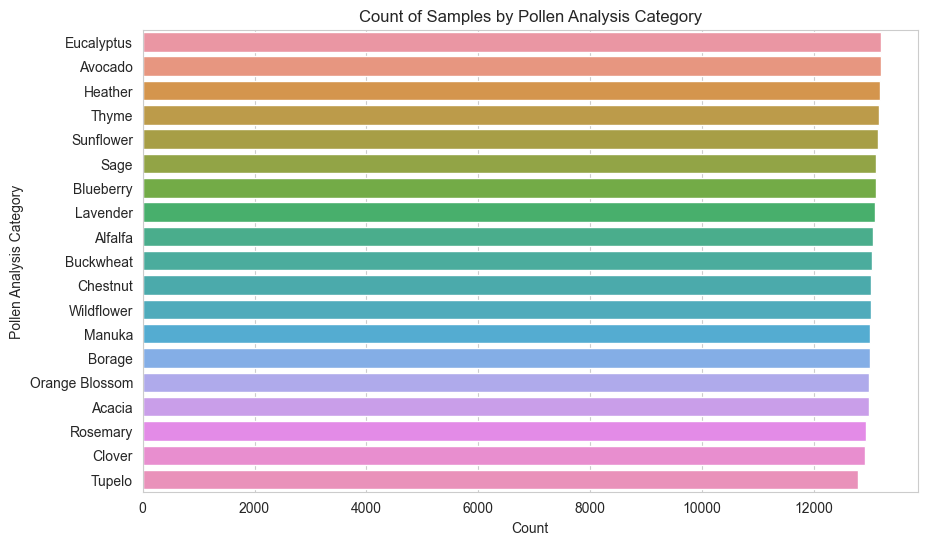

In [173]:
# Set the figure size for better visualization
plt.figure(figsize=(10, 6))

# Count plot for Pollen_analysis categories
sns.countplot(data=df, y='Pollen_analysis', order = df['Pollen_analysis'].value_counts().index)
plt.title('Count of Samples by Pollen Analysis Category')
plt.xlabel('Count')
plt.ylabel('Pollen Analysis Category')
plt.show()

As can be seen in the figure, certain pollen analysis categories in the dataset have a high number of samples, while others have a low number of samples. This distribution may be important for classification tasks, as sample imbalance may affect model training and performance.

#### Check the distribution of Price and Purity under different Pollen_analysis categories by using box line graphs. This helps us to understand if there is a significant difference in Price and Purity for different types of honey.

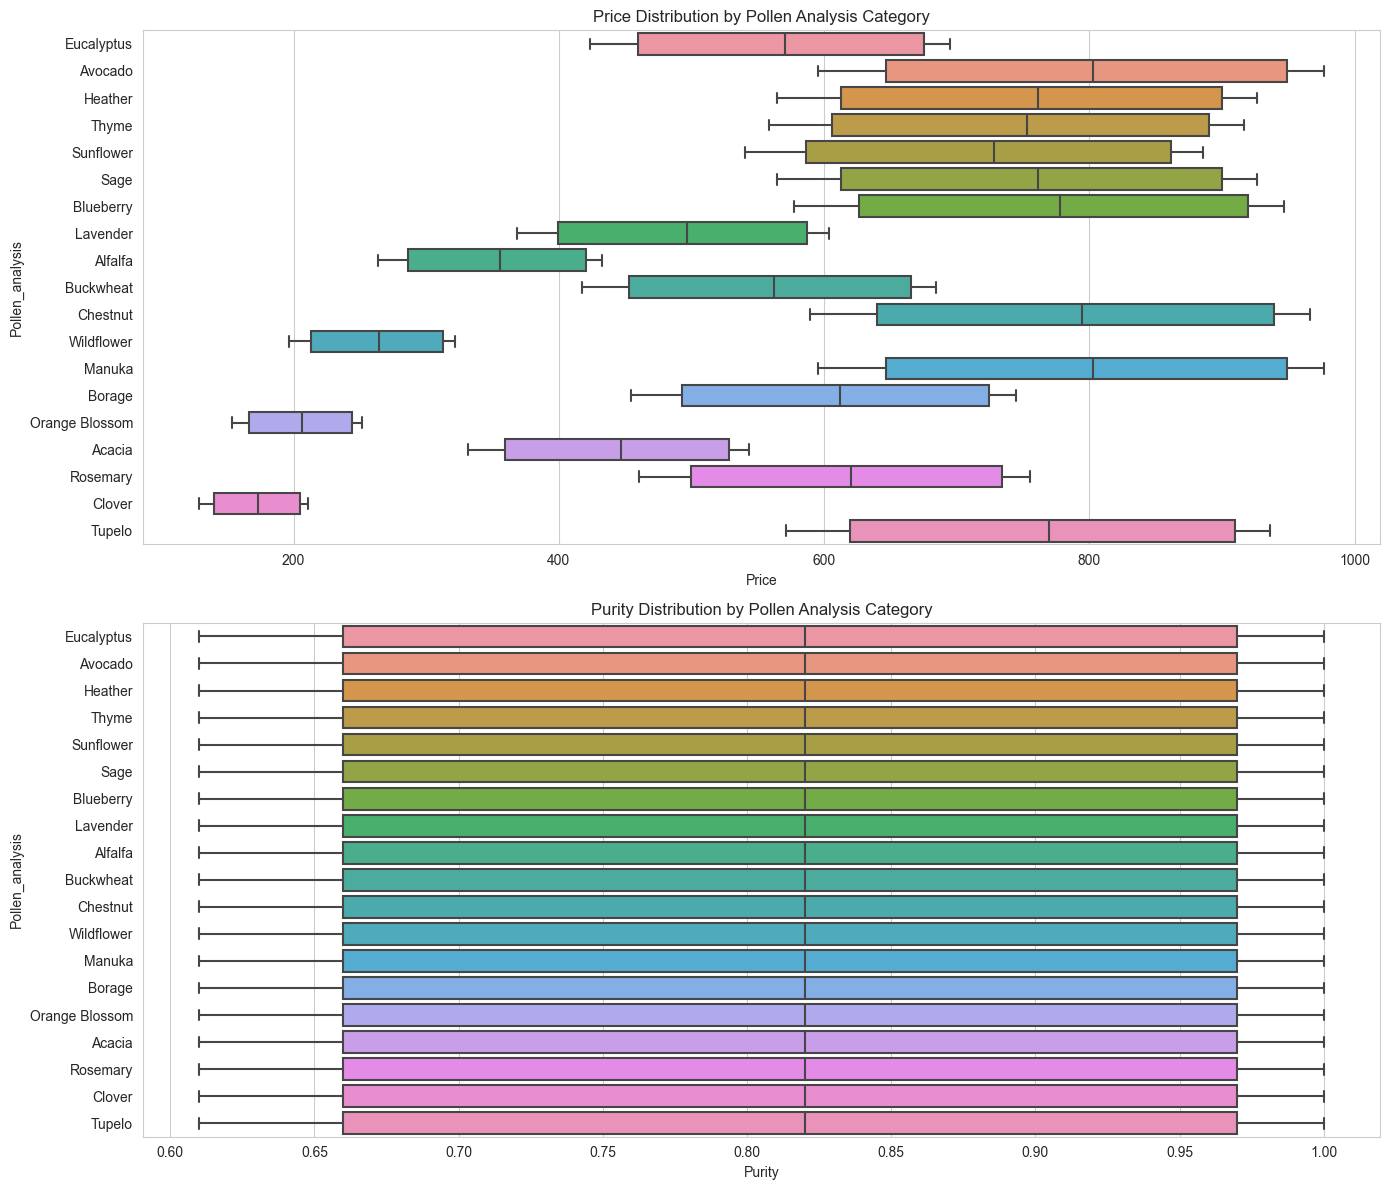

In [174]:
# Prepare the figure for boxplots
fig, axs = plt.subplots(2, 1, figsize=(14, 12))

# Plot boxplots for Price by Pollen_analysis category
sns.boxplot(data=df, x='Price', y='Pollen_analysis', ax=axs[0], order = df['Pollen_analysis'].value_counts().index)
axs[0].set_title('Price Distribution by Pollen Analysis Category')

# Plot boxplots for Purity by Pollen_analysis category
sns.boxplot(data=df, x='Purity', y='Pollen_analysis', ax=axs[1], order = df['Pollen_analysis'].value_counts().index)
axs[1].set_title('Purity Distribution by Pollen Analysis Category')

plt.tight_layout()
plt.show()

Price distribution: There were significant differences in the prices of honey from different pollen analysis categories. Some categories showed a wide range of honey prices, while others were relatively concentrated. In addition, some categories showed more high-priced outliers.

Purity distribution: The purity of honey also showed some variation across pollen analysis categories. The purity distribution is relatively concentrated in most categories, but some categories show a wider range of distribution and some outliers.

#### Based on the visualization between Pollen_analysis and Price suggests that different pollen analysis categories may have an impact on the price of honey, i.e. there may be a correlation between these two variables.

#### Correlation heat map without Pollen_analysis

C:\Users\admin\AppData\Local\Temp\ipykernel_24828\736010562.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


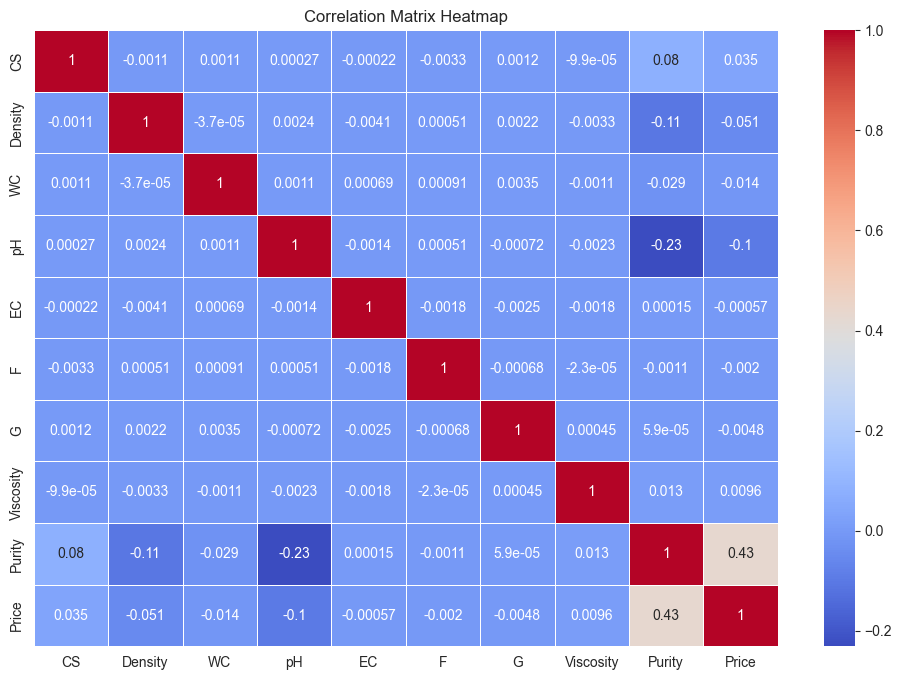

In [175]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Generate a heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## 3. Feature engineering

#### As long as we have already know that the Pollen_analysis has correlation with the price, we have to do something to make this feature usable.

### 3.1 Data transformation

#### Beacause the Pollen_analysis is a column with text, if we can transfer it to data, that would help our result

So we use one-hot encoding

In [176]:
one_hot_encoded = pd.get_dummies(df['Pollen_analysis'], prefix='Pollen_analysis')
one_hot_encoded.head()
df = pd.concat([df, one_hot_encoded], axis=1)
df.head()

,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity,...,Pollen_analysis_Heather,Pollen_analysis_Lavender,Pollen_analysis_Manuka,Pollen_analysis_Orange Blossom,Pollen_analysis_Rosemary,Pollen_analysis_Sage,Pollen_analysis_Sunflower,Pollen_analysis_Thyme,Pollen_analysis_Tupelo,Pollen_analysis_Wildflower
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,Blueberry,4844.50,0.68,...,0,0,0,0,0,0,0,0,0,0
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,Alfalfa,6689.02,0.89,...,0,0,0,0,0,0,0,0,0,0
2,4.61,1.84,23.72,7.31,0.80,27.47,34.36,Chestnut,6883.60,0.66,...,0,0,0,0,0,0,0,0,0,0
3,1.77,1.40,16.61,4.01,0.78,31.52,28.15,Blueberry,7167.56,1.00,...,0,0,0,0,0,0,0,0,0,0
4,6.11,1.25,19.63,4.82,0.90,29.65,42.52,Alfalfa,5125.44,1.00,...,0,0,0,0,0,0,0,0,0,0


#### Once the coding is complete, we look at the correlation again. The results verify that pollen_analysis is indeed correlated with price

C:\Users\admin\AppData\Local\Temp\ipykernel_24828\637821820.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


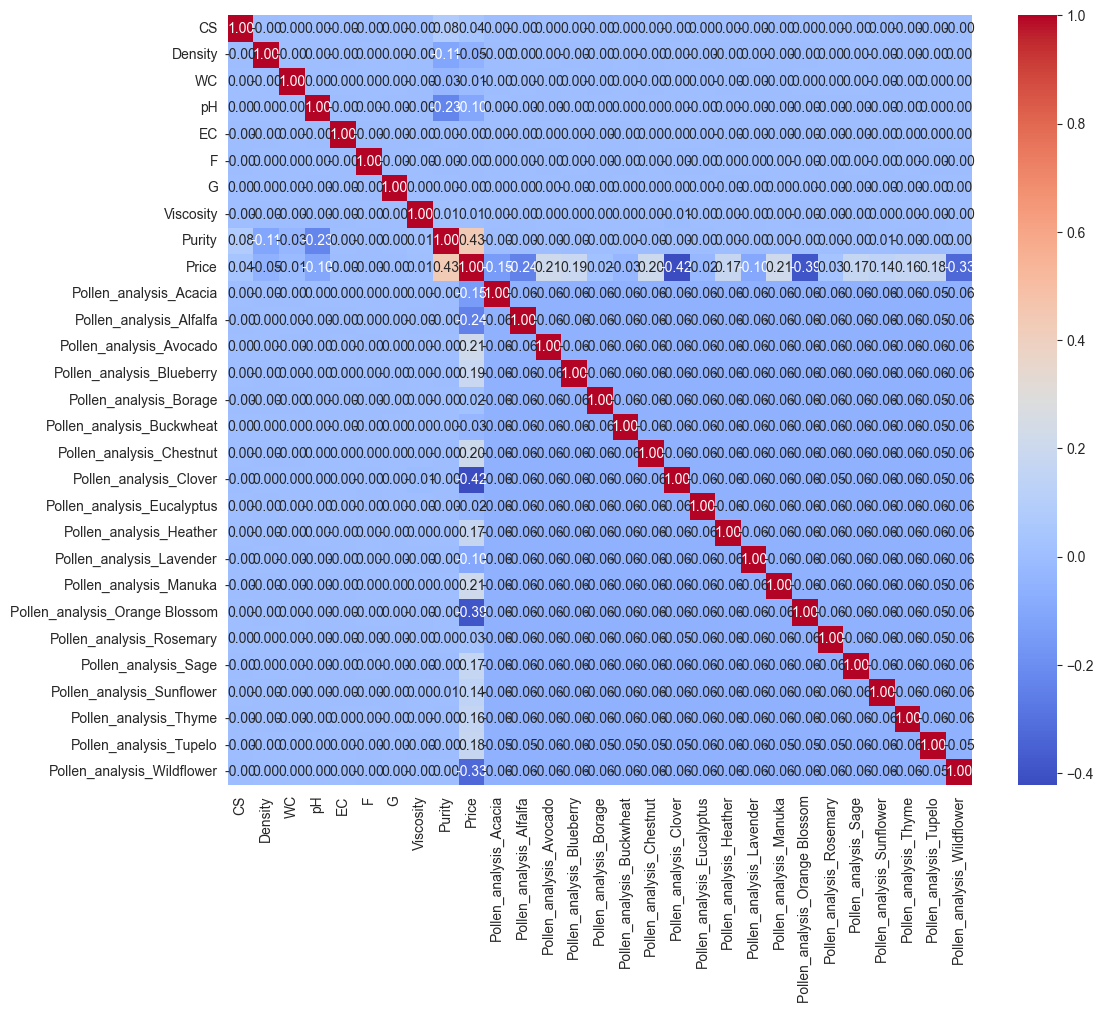

In [177]:
corr_matrix = df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

#### For machine learning to allow for better gradient descent, we had better normalize the rest of the features.
why do we do the normalize here? because the price is something we want to predict, the range is wide, once we normalized, the result is easier to read

In [178]:

# we can do it manully, but usually we do it with package 
from sklearn.preprocessing import MinMaxScaler

# normalization data
scaler = MinMaxScaler()

df['CS'] = scaler.fit_transform(df['CS'].values.reshape(-1, 1))
df['Density'] = scaler.fit_transform(df['Density'].values.reshape(-1, 1))
df['WC'] = scaler.fit_transform(df['WC'].values.reshape(-1, 1))
df['pH'] = scaler.fit_transform(df['pH'].values.reshape(-1, 1))
df['EC'] = scaler.fit_transform(df['EC'].values.reshape(-1, 1))
df['F'] = scaler.fit_transform(df['F'].values.reshape(-1, 1))
df['G'] = scaler.fit_transform(df['G'].values.reshape(-1, 1))
df['Viscosity'] = scaler.fit_transform(df['Viscosity'].values.reshape(-1, 1))
df['Price'] = scaler.fit_transform(df['Price'].values.reshape(-1, 1))


df.head()


,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity,...,Pollen_analysis_Heather,Pollen_analysis_Lavender,Pollen_analysis_Manuka,Pollen_analysis_Orange Blossom,Pollen_analysis_Rosemary,Pollen_analysis_Sage,Pollen_analysis_Sunflower,Pollen_analysis_Thyme,Pollen_analysis_Tupelo,Pollen_analysis_Wildflower
0,0.201111,0.830769,0.849231,0.758,0.30,0.634000,0.5452,Blueberry,0.393468,0.68,...,0,0,0,0,0,0,0,0,0,0
1,0.941111,0.938462,0.423077,0.940,0.05,0.605000,0.5764,Alfalfa,0.610473,0.89,...,0,0,0,0,0,0,0,0,0,0
2,0.401111,0.969231,0.901538,0.962,0.50,0.249000,0.5744,Chestnut,0.633365,0.66,...,0,0,0,0,0,0,0,0,0,0
3,0.085556,0.292308,0.354615,0.302,0.40,0.384000,0.3260,Blueberry,0.666772,1.00,...,0,0,0,0,0,0,0,0,0,0
4,0.567778,0.061538,0.586923,0.464,1.00,0.321667,0.9008,Alfalfa,0.426520,1.00,...,0,0,0,0,0,0,0,0,0,0


### 3.2 Because this dataset is not too difficult, we found some import features probably can effect to our machine learning result. So we do not need to a lot of feature constructions. But if your dataset is more complicated, I suggest to do some feature construction, and check the correlationship after that

### 3.3 Feature selection. 

To select the features that are most relevant to price using statistical tests, we can use Pearson's correlation coefficient for numerical features and ANOVA for categorical features.These tests can help us determine the strength and statistical significance of the relationship between each feature and price.

In [179]:
from scipy import stats

# ANOVA test for 'Pollen_analysis' categorical feature against 'Price'
anova_results = stats.f_oneway(*(df[df['Pollen_analysis'] == category]['Price'] for category in df['Pollen_analysis'].unique()))

# Pearson correlation for numeric features against 'Price'
correlations = df.corr()['Price'].sort_values(ascending=False)

anova_results, correlations.drop('Price')  # Drop 'Price' correlation with itself

C:\Users\admin\AppData\Local\Temp\ipykernel_24828\3192331985.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()['Price'].sort_values(ascending=False)


(F_onewayResult(statistic=51993.54158292249, pvalue=0.0),
 Purity                            0.432581
 Pollen_analysis_Avocado           0.213055
 Pollen_analysis_Manuka            0.212428
 Pollen_analysis_Chestnut          0.202171
 Pollen_analysis_Blueberry         0.186577
 Pollen_analysis_Tupelo            0.175431
 Pollen_analysis_Heather           0.172688
 Pollen_analysis_Sage              0.170029
 Pollen_analysis_Thyme             0.162046
 Pollen_analysis_Sunflower         0.139697
 CS                                0.035166
 Pollen_analysis_Rosemary          0.027649
 Pollen_analysis_Borage            0.019198
 Viscosity                         0.009632
 EC                               -0.000571
 F                                -0.002041
 G                                -0.004815
 WC                               -0.014381
 Pollen_analysis_Eucalyptus       -0.023168
 Pollen_analysis_Buckwheat        -0.030952
 Density                          -0.050518
 Pollen_analysis_L

## 4. Choose a model and train it

Based on something we found above, I believe the linar regression could be helpful

In [180]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

### 4.1 BUT, we have to double check our dataset again, to make sure that everything is okay to model.

In [181]:
df.head()

,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity,...,Pollen_analysis_Heather,Pollen_analysis_Lavender,Pollen_analysis_Manuka,Pollen_analysis_Orange Blossom,Pollen_analysis_Rosemary,Pollen_analysis_Sage,Pollen_analysis_Sunflower,Pollen_analysis_Thyme,Pollen_analysis_Tupelo,Pollen_analysis_Wildflower
0,0.201111,0.830769,0.849231,0.758,0.30,0.634000,0.5452,Blueberry,0.393468,0.68,...,0,0,0,0,0,0,0,0,0,0
1,0.941111,0.938462,0.423077,0.940,0.05,0.605000,0.5764,Alfalfa,0.610473,0.89,...,0,0,0,0,0,0,0,0,0,0
2,0.401111,0.969231,0.901538,0.962,0.50,0.249000,0.5744,Chestnut,0.633365,0.66,...,0,0,0,0,0,0,0,0,0,0
3,0.085556,0.292308,0.354615,0.302,0.40,0.384000,0.3260,Blueberry,0.666772,1.00,...,0,0,0,0,0,0,0,0,0,0
4,0.567778,0.061538,0.586923,0.464,1.00,0.321667,0.9008,Alfalfa,0.426520,1.00,...,0,0,0,0,0,0,0,0,0,0


#### We found that the original Pollen_analysis is still in our dataset, we could not keep it for our model. So delete it

In [182]:
df.drop(['Pollen_analysis'], axis=1, inplace=True)
df.head()

,CS,Density,WC,pH,EC,F,G,Viscosity,Purity,Price,...,Pollen_analysis_Heather,Pollen_analysis_Lavender,Pollen_analysis_Manuka,Pollen_analysis_Orange Blossom,Pollen_analysis_Rosemary,Pollen_analysis_Sage,Pollen_analysis_Sunflower,Pollen_analysis_Thyme,Pollen_analysis_Tupelo,Pollen_analysis_Wildflower
0,0.201111,0.830769,0.849231,0.758,0.30,0.634000,0.5452,0.393468,0.68,0.609125,...,0,0,0,0,0,0,0,0,0,0
1,0.941111,0.938462,0.423077,0.940,0.05,0.605000,0.5764,0.610473,0.89,0.303230,...,0,0,0,0,0,0,0,0,0,0
2,0.401111,0.969231,0.901538,0.962,0.50,0.249000,0.5744,0.633365,0.66,0.602521,...,0,0,0,0,0,0,0,0,0,0
3,0.085556,0.292308,0.354615,0.302,0.40,0.384000,0.3260,0.666772,1.00,0.964350,...,0,0,0,0,0,0,0,0,0,0
4,0.567778,0.061538,0.586923,0.464,1.00,0.321667,0.9008,0.426520,1.00,0.358385,...,0,0,0,0,0,0,0,0,0,0


## Linar regression

#### Now our dataset is okay to use

### 4.2 Drop the column we want to predict in the X, and initial this column to y

In [183]:
X = df.drop('Price', axis = 1)

In [184]:
y = df['Price']

### 4.3 Standardization

In [185]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [186]:
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# 显示标准化后的前几行数据以观察变化
X_scaled_df.head()

,CS,Density,WC,pH,EC,F,G,Viscosity,Purity,Pollen_analysis_Acacia,...,Pollen_analysis_Heather,Pollen_analysis_Lavender,Pollen_analysis_Manuka,Pollen_analysis_Orange Blossom,Pollen_analysis_Rosemary,Pollen_analysis_Sage,Pollen_analysis_Sunflower,Pollen_analysis_Thyme,Pollen_analysis_Tupelo,Pollen_analysis_Wildflower
0,-1.037132,1.141911,1.210410,0.896054,-0.690263,0.467824,0.156235,-0.369907,-1.036256,-0.23502,...,-0.237029,-0.236069,-0.235277,-0.235172,-0.23458,-0.236364,-0.236659,-0.236735,-0.233198,-0.235402
1,1.530390,1.514602,-0.267465,1.526222,-1.553653,0.367314,0.264174,0.381200,0.470022,-0.23502,...,-0.237029,-0.236069,-0.235277,-0.235172,-0.23458,-0.236364,-0.236659,-0.236735,-0.233198,-0.235402
2,-0.343207,1.621085,1.391809,1.602397,0.000449,-0.866529,0.257255,0.460435,-1.179711,-0.23502,...,-0.237029,-0.236069,-0.235277,-0.235172,-0.23458,-0.236364,-0.236659,-0.236735,-0.233198,-0.235402
3,-1.438066,-0.721543,-0.504885,-0.682831,-0.344907,-0.398639,-0.602109,0.576066,1.259026,-0.23502,...,-0.237029,-0.236069,-0.235277,-0.235172,-0.23458,-0.236364,-0.236659,-0.236735,-0.233198,-0.235402
4,0.235064,-1.520166,0.300743,-0.121912,1.727230,-0.614677,1.386467,-0.255506,1.259026,-0.23502,...,-0.237029,-0.236069,-0.235277,-0.235172,-0.23458,-0.236364,-0.236659,-0.236735,-0.233198,-0.235402


### 4.4 Split into training and test sets

In [187]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

### 4.5 Choose model

In [188]:
model = LinearRegression()

### 4.6 Fit the model with data

In [189]:
model.fit(X_train, y_train)

LinearRegression()

In [190]:
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

### 4.7 Check the result with mse, rmse, R2

In [191]:
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
rmse = np.sqrt(mse)

print(f'RMSE: {rmse}')

Mean Squared Error: 0.0017434328792657844
RMSE: 0.041754435444222984


In [192]:
from sklearn.metrics import r2_score

print('Model Accuracy Train :',r2_score(y_train,y_pred_train)*100,'%')

print('Model Accuracy Test  :',r2_score(y_test,y_pred_test)*100,'%')

Model Accuracy Train : 97.71803859974102 %
Model Accuracy Test  : 97.69631884843349 %


### 4.8 validation

#### cross-validation

In [193]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
import numpy as np


X = df.drop('Price', axis=1)  
y = df['Price']  


model = LinearRegression()

scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')

print("MSE scores for each fold:", -scores)

print("Average MSE:", -np.mean(scores))
print("Standard deviation of MSE:", np.std(scores))

MSE scores for each fold: [0.00175477 0.00172863 0.00172624 0.00175661 0.0017136 ]
Average MSE: 0.0017359697092655109
Standard deviation of MSE: 1.6901787597488956e-05


#### Check the model predict difference

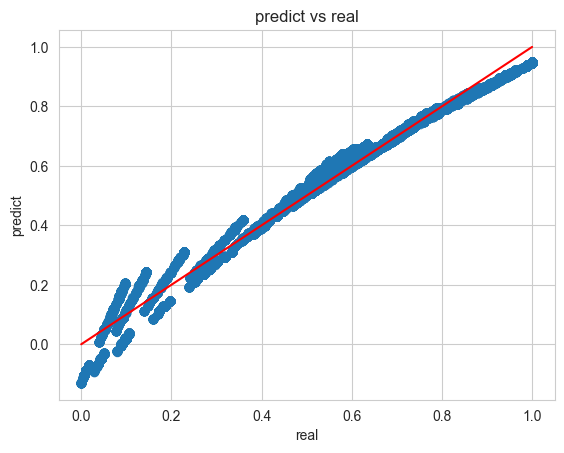

In [195]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.title('predict vs real')
plt.xlabel('real')
plt.ylabel('predict')

plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red') 

plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

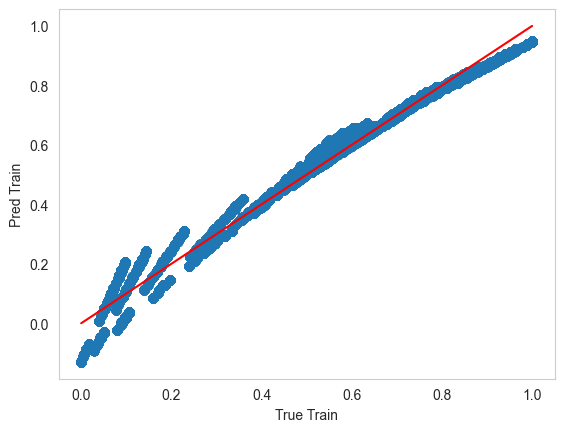

In [196]:
plt.scatter(y_train,y_pred_train)
plt.grid()
plt.xlabel('True Train')
plt.ylabel('Pred Train')

plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red') 

plt.show

#### The red line is the ideal line, which means perfect predict

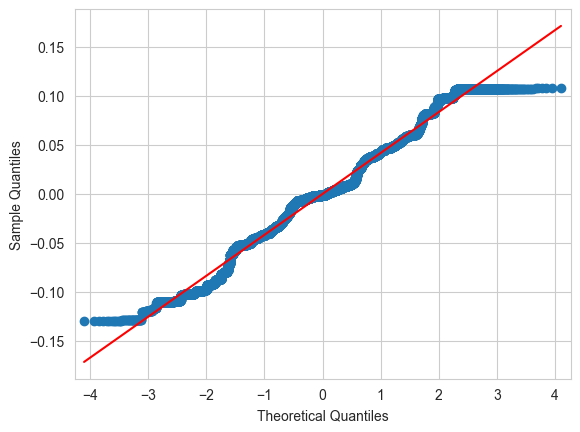

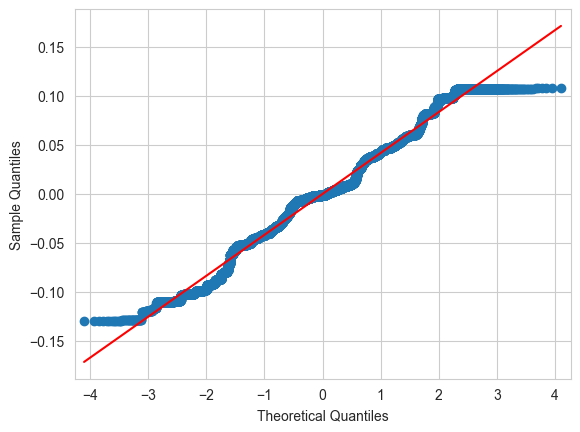

In [197]:
from statsmodels.graphics.gofplots import qqplot

qqplot(y_pred_test-y_test,line='s')

## XGB model

In [198]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df.drop('Price', axis=1)  
y = df['Price']  


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


xg_reg = xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)


xg_reg.fit(X_train, y_train)


y_pred = xg_reg.predict(X_test)


xgb_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("xgb_RMSE: %f" % (xgb_rmse))

xgb_RMSE: 0.212003


In [199]:
#try to see SI

average_price = y_test.mean()


scatter_index = rmse / average_price


print(f'Scatter Index: {scatter_index}')

Scatter Index: 0.07617990714736932


In [200]:
average_price = y_test.mean()


xgb_scatter_index = xgb_rmse / average_price

print(f'XGB Scatter Index: {xgb_scatter_index}')

XGB Scatter Index: 0.3867943098484304


In [209]:
from sklearn.metrics import r2_score

# 真实值 y_test 和 XGBoost 模型的预测值 y_pred
r2 = r2_score(y_test, y_pred)
print(f'XGBoost Model R-squared: {r2}')

XGBoost Model R-squared: 0.40611597389072507
